# Importing Libraries and Data

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import numpy as np

In [2]:
ds = tfds.load('fashion_mnist',split='train')

In [3]:
ds.as_numpy_iterator().next()['label']

2

In [4]:
# setting up an iterator
data_iterator = ds.as_numpy_iterator()

In [48]:
# getting data out of pipeline
data_iterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  1],
         [  1],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  2],
         [  1],
         [  1],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 69],
         [146],
         [ 56],
         [  4],
         [ 14],
         [ 10],
         [ 59],
         [149],
         [ 70],
         [  0],
         [  0],
         [  0],
         [  0],
         [  2],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  1],
         

# Visualization

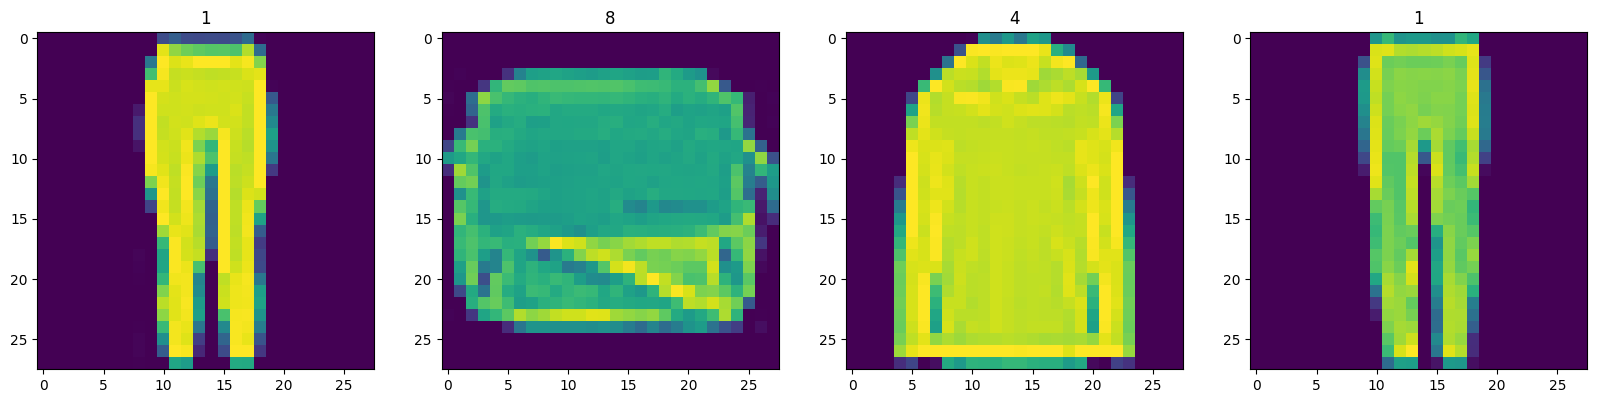

In [6]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
    sample = data_iterator.next()
    ax[idx].imshow(np.squeeze(sample['image']))
    ax[idx].title.set_text(sample['label'])

In [7]:
def scale_images(data):
    image = data['image']
    return image/255

In [8]:
# Reloaded Dataset
df = tfds.load('fashion_mnist',split='train')
# Mapped scaled images by running through functions
df = df.map(scale_images)
# Cache the dataset for that batch
df = df.cache()
# Shuffle it up
df = df.shuffle(60000)
# Batch into 128 images per sample
df = df.batch(128)
# Reduces the likelihood of bottlenecking
df = df.prefetch(64)

In [9]:
df.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# Building the models

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,LeakyReLU,Dropout,Dense,Flatten,UpSampling2D,Reshape

### Building a Generator

In [11]:
def build_generator():
    model = Sequential()

    # Beginnings of a generated image
    model.add(Dense(7*7*128,input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    # Up sampling block 1
    model.add(UpSampling2D())
    model.add(Convolution2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))

    # Up sampling block 2
    model.add(UpSampling2D())
    model.add(Convolution2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))

    # Convolutional Block 1
    model.add(Convolution2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))

    # Convolutional Block 2
    model.add(Convolution2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))

    # Conv layer to get one channel
    model.add(Convolution2D(1,4,padding='same',activation='sigmoid'))

    return model

In [12]:
generator = build_generator()
generator.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6272)                │         809,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 14, 14, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 1)           │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


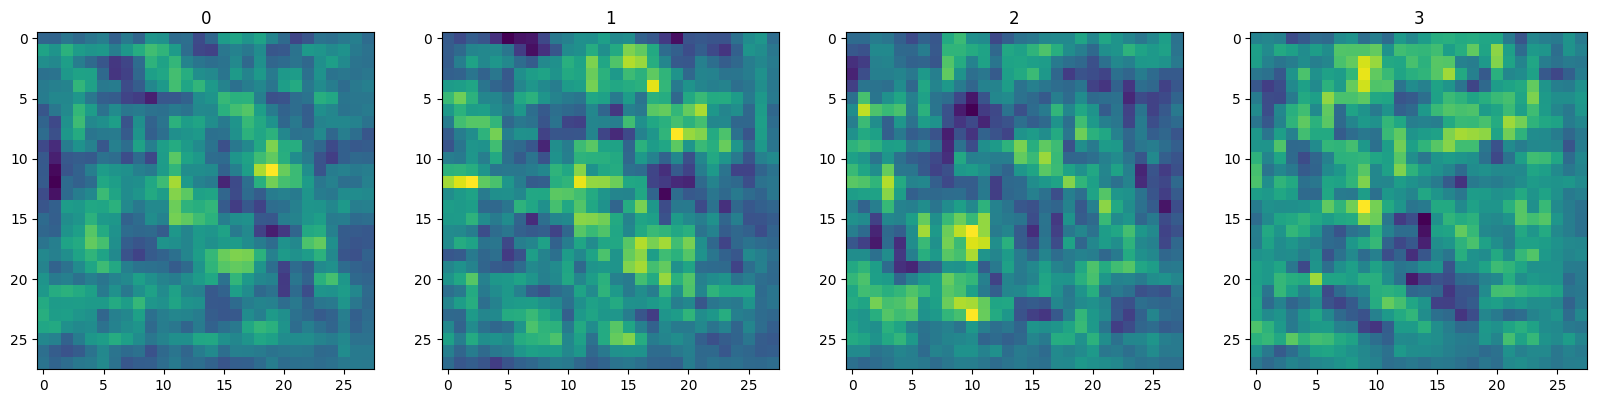

In [13]:
img = generator.predict(np.random.randn(4,128,1))
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(img):
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)

### Building Discriminator

In [14]:
def build_discriminator():
    model = Sequential()

    # First conv block
    model.add(Convolution2D(32,5,input_shape=(28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Second conv block
    model.add(Convolution2D(64,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Third conv block
    model.add(Convolution2D(128,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Fourth conv block
    model.add(Convolution2D(256,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # flatten and pass through dense
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation='sigmoid'))

    return model

In [15]:
discriminator = build_discriminator()
discriminator.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 20, 20, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          36,865 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
discriminator.predict(np.expand_dims(img,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step


array([[0.49802324]], dtype=float32)

# Constructing a training loop

In [17]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [18]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [19]:
from tensorflow.keras.models import Model

In [20]:
class GAN(Model):
    def __init__(self,generator,discriminator,*args,**kwargs):
        # Pass through args for our base class
        super().__init__(*args,**kwargs)
        # Create attributes for gen and disc
        self.generator = generator
        self.discriminator = discriminator

    def compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
        # Compile with base class
        super().compile(*args,**kwargs)

        # Create attributes
        self.g_opt = g_opt
        self.g_loss = g_loss
        self.d_opt = d_opt
        self.d_loss = d_loss

    def train_step(self, batch):
        # get the data
        real_images =  batch
        fake_images = generator(tf.random.normal((128,128,1)),training=False)

        # Training discriminator
        with tf.GradientTape() as d_tape:

            # Pass the real and fake images to discrminator
            yhat_real = self.discriminator(real_images,training=True)
            yhat_fake = self.discriminator(fake_images,training=True)
            yhat_realfake = tf.concat([yhat_real,yhat_fake],axis=0)

            # Create labels for real and fake images
            y_realfake = tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis=0)

            # Add some noise to output
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real,noise_fake],axis=0)

            # Calculate loss
            total_d_loss = self.d_loss(y_realfake,yhat_realfake)

        # Apply Back Propogation
        dgrad = d_tape.gradient(total_d_loss,self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))

        # Training the generator
        with tf.GradientTape() as g_tape:

            # Generate images using generator
            gen_images = self.generator(tf.random.normal((128,128,1)), training = True)

            # Create predicted labels
            predicted_labels = self.discriminator(gen_images,training = False)

            # Calculate loss
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)

        # Apply Back Propogation
        g_grad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(g_grad,self.generator.trainable_variables))


        return {'d_loss':total_d_loss,'g_loss':total_g_loss}

In [21]:
fashgan = GAN(generator,discriminator)

In [22]:
fashgan.compile(g_opt,d_opt,g_loss,d_loss)

In [23]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [29]:
class ModelMonitor(Callback):
    def __init__(self,num_img=3,latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch , logs = None):
        random_latent_vectors = tf.random.uniform((self.num_img,self.latent_dim,1))
        generated_img = self.model.generator(random_latent_vectors)
        generated_img *= 255
        generated_img.numpy()



In [30]:
df.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [31]:
tf.keras.__version__

'3.4.1'

In [32]:
print(f'Tensorflow has access to \n{tf.config.list_physical_devices()}')

Tensorflow has access to 
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [33]:
hist = fashgan.fit(df, epochs = 20 , callbacks=ModelMonitor())

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 206ms/step - d_loss: 0.6652 - g_loss: 1.0218
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 206ms/step - d_loss: 0.6959 - g_loss: 0.6259
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 206ms/step - d_loss: 0.7000 - g_loss: 0.6491
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 207ms/step - d_loss: 0.6923 - g_loss: 0.6856
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 207ms/step - d_loss: 0.6904 - g_loss: 0.6837
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 206ms/step - d_loss: 0.6857 - g_loss: 0.6907
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 206ms/step - d_loss: 0.5928 - g_loss: 0.9283
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 207ms/step - d_loss: 0.6660 - g_loss: 0.4705
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 207ms/step - d_loss: 0.6987 - g_loss: 0.6063
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 207ms/step - d_loss: 0.6856 - g_loss: 0.6235
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 207ms/step - d_loss: 0.6946 - g_loss: 0.6395
Epoch 12/20
469/

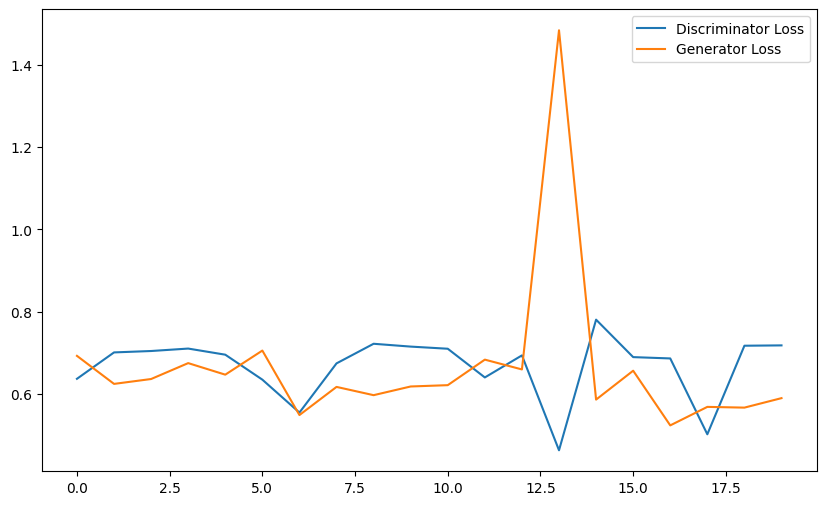

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(hist.history['d_loss'],label="Discriminator Loss")
plt.plot(hist.history['g_loss'],label="Generator Loss")
plt.legend()
plt.show()

In [39]:
images = generator.predict(tf.random.normal((16,128,1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


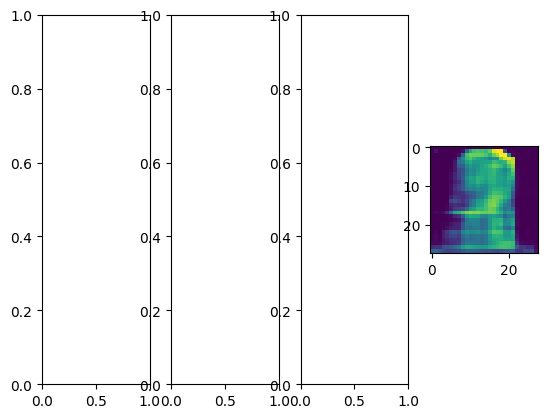

In [46]:
fig,ax = plt.subplots(ncols=4)
for r in range(4):
  ax[r] = plt.imshow(images[r])